In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df =pd.read_csv('project/airline_Passenger_Satisfaction.csv') #Read the datset 
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
df.duplicated().sum()#find the duplicate value, i ahve 0 duplicate value

0

In [4]:
df.info()#show all type of info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [5]:
df.isnull().sum()#findig the null value the column have 

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

<AxesSubplot:>

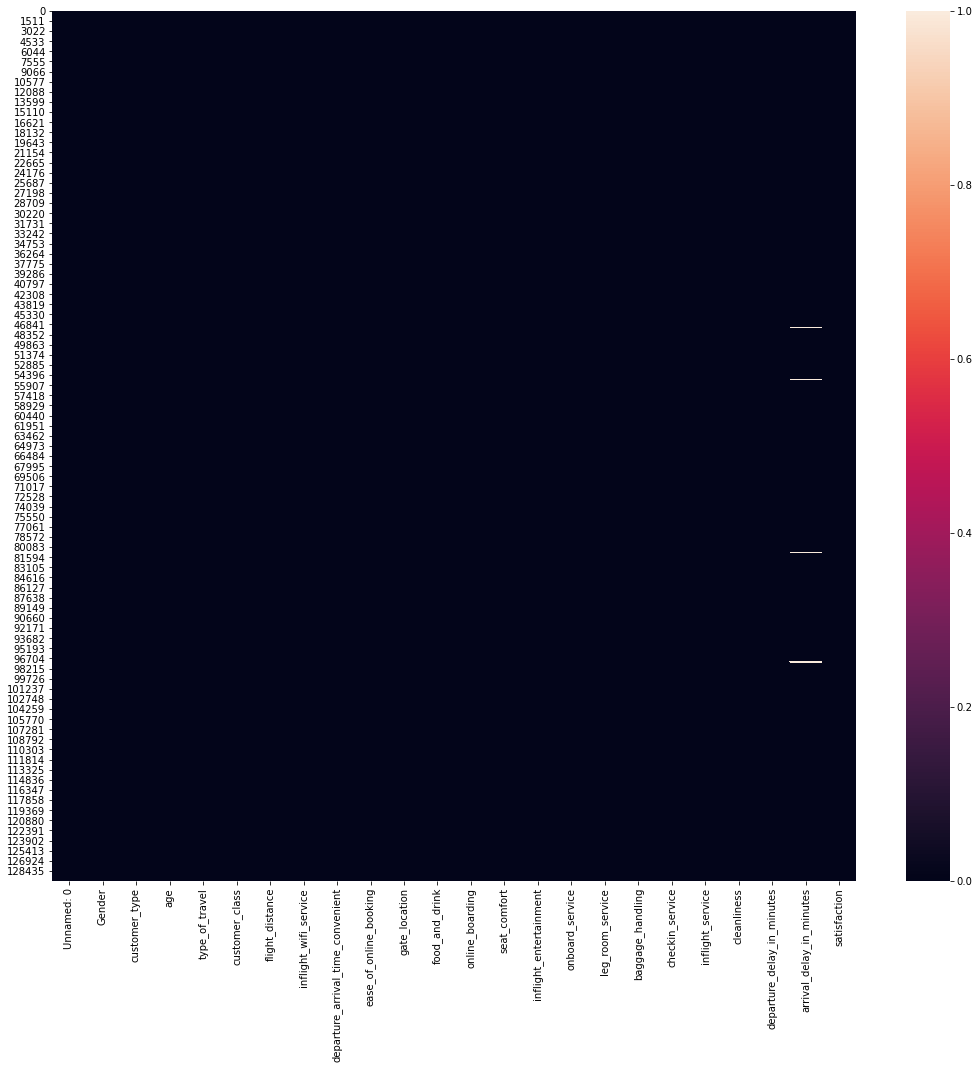

In [6]:
plt.figure(figsize=(18,16))
sns.heatmap(df.isnull()) #showing the null value in heatmap 

In [7]:
df.shape #show the rows and column of the dataset.

(129880, 24)

(129880, 23)

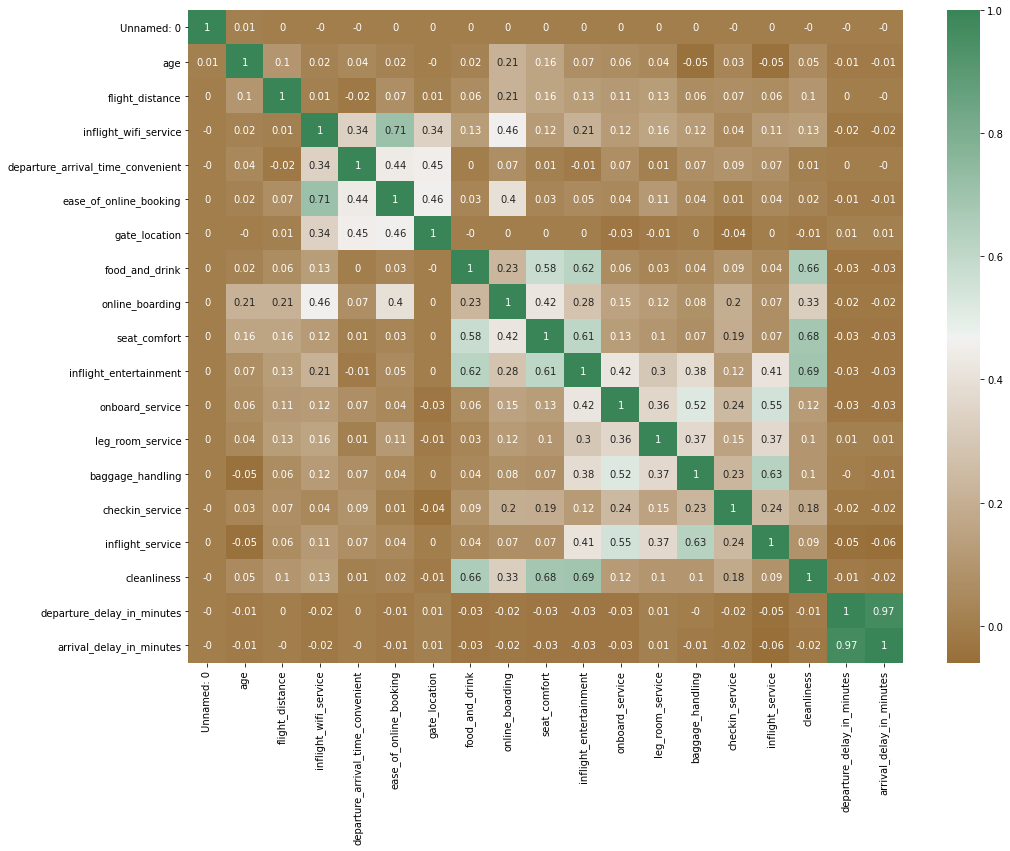

In [8]:
plt.figure(figsize=(16,12))#width,hight
correlation_matrix = df.corr().round(2) #take two numbers
sns.heatmap(data=correlation_matrix, annot=True,cmap=sns.diverging_palette(50, 500, n=500))#correlation matrix summarize the data and.annot=True is used for  the value 
df.drop("arrival_delay_in_minutes",axis=1,inplace=True)
df.dropna(inplace=True) #dropna drop all the null value of the row(if row=0)
df.reset_index(drop=True,inplace=True)
df.shape

In [9]:
from sklearn.preprocessing import OneHotEncoder #give the binary number
encoder = OneHotEncoder(drop='first',dtype=np.int64)
dfn = df[['type_of_travel', 'Gender','customer_type','customer_class','satisfaction']] #drop 5 of the column
dfn = encoder.fit_transform(dfn).toarray()
dfn = pd.DataFrame(dfn,columns=['Personal','Male','Loyal','Eco','Eco Plus','Satisfied'])#add all of this in the end of the column
df = pd.concat([df,dfn],axis=1)
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction,Personal,Male,Loyal,Eco,Eco Plus,Satisfied
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,25,neutral or dissatisfied,1,1,0,0,1,0
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,4,1,1,neutral or dissatisfied,0,1,1,0,0,0
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,5,0,satisfied,0,0,0,0,0,1
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,4,2,11,neutral or dissatisfied,0,0,0,0,0,0
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,0,satisfied,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,5,4,0,neutral or dissatisfied,0,1,1,0,0,0
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,5,4,0,satisfied,0,1,0,0,0,1
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,4,2,0,neutral or dissatisfied,1,0,0,1,0,0
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,5,4,0,satisfied,0,1,0,0,0,1


In [10]:
df.drop(['type_of_travel', 'Gender','customer_type','customer_class','satisfaction'],axis=1,inplace=True)#drop all those column because its not useable
df

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,Personal,Male,Loyal,Eco,Eco Plus,Satisfied
0,0,13,460,3,4,3,1,5,3,5,...,4,5,5,25,1,1,0,0,1,0
1,1,25,235,3,2,3,3,1,3,1,...,1,4,1,1,0,1,1,0,0,0
2,2,26,1142,2,2,2,2,5,5,5,...,4,4,5,0,0,0,0,0,0,1
3,3,25,562,2,5,5,5,2,2,2,...,1,4,2,11,0,0,0,0,0,0
4,4,61,214,3,3,3,3,4,5,5,...,3,3,3,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,34,526,3,3,3,1,4,3,4,...,4,5,4,0,0,1,1,0,0,0
129876,129876,23,646,4,4,4,4,4,4,4,...,5,5,4,0,0,1,0,0,0,1
129877,129877,17,828,2,5,1,5,2,1,2,...,5,4,2,0,1,0,0,1,0,0
129878,129878,14,1127,3,3,3,3,4,4,4,...,4,5,4,0,0,1,0,0,0,1


In [11]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled1 = sc.fit_transform(x_train)
x_test_scaled1 = sc.transform(x_test)


from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_train_scaled2 = sc.fit_transform(x_train)
X_test_scaled2 = sc.transform(x_test)
 
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train_scaled3 = sc.fit_transform(x_train)
X_test_scaled3 = sc.transform(x_test)

from sklearn.preprocessing import Normalizer
sc= Normalizer()
X_train_scaled4 = sc.fit_transform(x_train)
X_test_scaled4 = sc.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200) 
model.fit(x_train,y_train)
score = model.score(x_train,y_train)
print("Training score: {:.3f}".format(score)) 
score2 = model.score(x_test,y_test)
print("Testing score:{:.3f}".format(score2))

Training score: 0.625
Testing score:0.627


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_test_predict = model.predict(x_test)
confusion = confusion_matrix(y_test,y_test_predict)  
print(confusion)
sns.heatmap(confusion/np.sum(confusion), annot = True, cmap="Rreens", fmt=".1%" ) 
plt.title("confusion matrix-Logestic Regression")
plt.show


[[13551  4874]
 [ 7240  6805]]


ValueError: 'Rreens' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<AxesSubplot:>

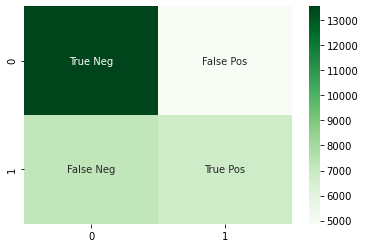

In [16]:
labels =["True Neg", "False Pos", "False Neg", "True Pos"] 
labels = np.array(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, cmap="Greens", fmt="")

In [17]:
from sklearn.metrics import classification_report #need to edit
y_test_predict = model.predict(x_test)
print(classification_report(y_test, y_test_predict ))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69     18425
           1       0.58      0.48      0.53     14045

    accuracy                           0.63     32470
   macro avg       0.62      0.61      0.61     32470
weighted avg       0.62      0.63      0.62     32470



In [18]:
from sklearn.preprocessing import PolynomialFeatures
for d in range(3):
    polynomial = PolynomialFeatures(degree = d+1)
    x_poly = polynomial.fit_transform(x)
    model = LogisticRegression()
    model.fit(x_poly,y)
    print("degree=",d+1,"r2={:.3f}".format(model.score(x_poly,y)))

degree= 1 r2=0.691


C:\Users\ashsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


degree= 2 r2=0.633


C:\Users\ashsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


degree= 3 r2=0.622


In [19]:
from sklearn.linear_model import LogisticRegression

def regression(x_train,x_test,y_train,y_test):

    model = LogisticRegression()

    model.fit(x_train,y_train)

    train_score = model.score(x_train,y_train)

    test_score = model.score(x_test,y_test)

    print("training score: {:.3f} ".format(train_score))

    print("testing score: {:.3f} ".format(test_score))

In [20]:
print("before scalling")
regression(x_train,x_test,y_train,y_test)
print("after standar scalling")
regression(x_train_scaled1,x_test_scaled1,y_train,y_test)
print("after MinMaxScaler scalling")
regression(X_train_scaled2,X_test_scaled2,y_train,y_test)
print("after RobustScaler scalling")
regression(X_train_scaled3,X_test_scaled3,y_train,y_test)
print("after Normalizer scalling")
regression(X_train_scaled4,X_test_scaled4,y_train,y_test)


before scalling
training score: 0.625 
testing score: 0.627 
after standar scalling
training score: 0.875 
testing score: 0.873 
after MinMaxScaler scalling
training score: 0.875 
testing score: 0.873 
after RobustScaler scalling
training score: 0.875 
testing score: 0.873 
after Normalizer scalling
training score: 0.578 
testing score: 0.580 


In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 
model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
training = model.score(x_train, y_train)
print("Training score:{:.3f}".format(training))
testing = model.score(x_test, y_test)
print("Testing score:{:.3f}".format(testing))

Training score:0.732
Testing score:0.598


In [22]:

from sklearn.metrics import confusion_matrix
y_test_predict = model.predict(x_test)
confusion= confusion_matrix(y_test,y_test_predict)  
print(confusion_matrix)


<function confusion_matrix at 0x000001FF6520CD30>


<AxesSubplot:>

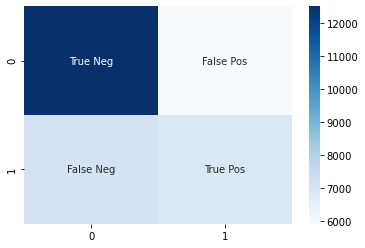

In [23]:
labels =["True Neg", "False Pos", "False Neg", "True Pos"]
labels = np.array(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, cmap="Blues", fmt="")

In [24]:
k_list = list(range(1,21))
weight_list = ['uniform','distance']
para_dict = dict(n_neighbors=k_list,weights=weight_list)
print(para_dict)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']}


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     18425
           1       0.54      0.49      0.51     14045

    accuracy                           0.60     32470
   macro avg       0.59      0.59      0.59     32470
weighted avg       0.59      0.60      0.60     32470



In [26]:
from sklearn.model_selection import RandomizedSearchCV
#model= KNeighborsClassifier()
#knn_2.fit(x_train,y_train)
random= RandomizedSearchCV(model,para_dict,cv=4,scoring="accuracy",return_train_score=False ,n_iter=5,random_state=5)
random.fit(x,y)

RandomizedSearchCV(cv=4, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [27]:
pd.DataFrame(random.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.484486,"{'weights': 'uniform', 'n_neighbors': 11}"
1,0.484332,"{'weights': 'uniform', 'n_neighbors': 12}"
2,0.484640,"{'weights': 'uniform', 'n_neighbors': 13}"
3,0.483639,"{'weights': 'distance', 'n_neighbors': 2}"
4,0.484085,"{'weights': 'distance', 'n_neighbors': 12}"


In [28]:
print("best score: {:.3}".format(random.best_score_))
print("used values:",random.best_params_)

best score: 0.485
used values: {'weights': 'uniform', 'n_neighbors': 13}


In [29]:
from sklearn.neighbors import KNeighborsClassifier

def knn(x_train,x_test,y_train,y_test):

    model = KNeighborsClassifier()

    model.fit(x_train,y_train)

    train_score = model.score(x_train,y_train)

    test_score = model.score(x_test,y_test)

    print("training score: {:.3f} ".format(train_score))

    print("testing score: {:.3f} ".format(test_score))

In [30]:
print("before scalling")
knn(x_train,x_test,y_train,y_test)
print("after standar scalling")
knn(x_train_scaled1,x_test_scaled1,y_train,y_test)
print("after MinMaxScaler scalling")
knn(X_train_scaled2,X_test_scaled2,y_train,y_test)
print("after RobustScaler scalling")
knn(X_train_scaled3,X_test_scaled3,y_train,y_test)
print("after Normalizer scalling")
knn(X_train_scaled4,X_test_scaled4,y_train,y_test)

before scalling
training score: 0.732 
testing score: 0.598 
after standar scalling


In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(x_train,y_train)

In [ ]:
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print("Training score:{:.3f}".format(train_score))
print("Testing score: {:.3f}".format(test_score))

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_predict = model.predict(x_test)
confusion = confusion_matrix(y_test,y_test_predict)  
print(confusion)
sns.heatmap(confusion/np.sum(confusion), annot = True, cmap="YlOrBr", fmt=".1%" ) 

In [ ]:
labels =["True Neg", "False Pos", "False Neg", "True Pos"]
labels = np.array(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, cmap="YlOrBr", fmt="")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
for d in range(3):
    polynomial = PolynomialFeatures(degree = d+1)
    x_poly = polynomial.fit_transform(x)
    model = MLPClassifier()
    model.fit(x_poly,y)
    print("degree=",d+1,"r2={:.3f}".format(model.score(x_poly,y)))

In [ ]:
from sklearn.neural_network import MLPClassifier

def mlp(x_train,x_test,y_train,y_test):

    model = MLPClassifier()

    model.fit(x_train,y_train)

    train_score = model.score(x_train,y_train)

    test_score = model.score(x_test,y_test)

    print("training score: {:.3f} ".format(train_score))

    print("testing score: {:.3f} ".format(test_score))

In [ ]:
print("before scalling")
mlp(x_train,x_test,y_train,y_test)
print("after standar scalling")
mlp(x_train_scaled1,x_test_scaled1,y_train,y_test)
print("after MinMaxScaler scalling")
mlp(X_train_scaled2,X_test_scaled2,y_train,y_test)
print("after RobustScaler scalling")
mlp(X_train_scaled3,X_test_scaled3,y_train,y_test)
print("after Normalizer scalling")
mlp(X_train_scaled4,X_test_scaled4,y_train,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=5,scoring='r2')
print(scores)
print("{:.3f}".format(scores.mean()))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled1 = sc.fit_transform(x_train)
x_test_scaled1 = sc.transform(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_train_scaled2 = sc.fit_transform(x_train)
X_test_scaled2 = sc.transform(x_test)

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train_scaled3 = sc.fit_transform(x_train)
X_test_scaled3 = sc.transform(x_test)

In [ ]:
from sklearn.preprocessing import Normalizer
sc= Normalizer()
X_train_scaled4 = sc.fit_transform(x_train)
X_test_scaled4 = sc.transform(x_test)

In [ ]:
#pd.plotting.scatter_matrix(df.iloc[:,:-1], c=y, figsize=(15,15), marker='o', s=60, alpha=0.8, cmap=plt.cm.Set1, edgecolor='k'  )